In [14]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, MaxPool1D
from keras.preprocessing.sequence import pad_sequences

In [15]:
import pickle
def load_pickle(file_name):
    with open(file_name, 'rb') as f:
        obj = pickle.load(f)
    return obj

In [26]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Test"], loc=0)

def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title("Model Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Test"], loc=0)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [20]:
x_train = load_pickle('x_train_0502.pickle')
labels = load_pickle('labels_0502.pickle')
y_train = np_utils.to_categorical(labels)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=1234)

len(X_train), len(X_test), len(y_train), len(y_test)

(134776, 14976, 134776, 14976)

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=1234)

len(X_train), len(X_val), len(y_train), len(y_val)

(80865, 53911, 80865, 53911)

In [23]:
max_features = 48496
text_max_words = 95

In [24]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPool1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(5, activation='softmax'))

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=10, batch_size=150, validation_data=(X_val, y_val))

Train on 80865 samples, validate on 53911 samples
Epoch 1/10
80865/80865 [==============================] - 36s 447us/step - loss: 0.0802 - acc: 0.9717 - val_loss: 0.1506 - val_acc: 0.9473
Epoch 2/10
80865/80865 [==============================] - 35s 434us/step - loss: 0.0578 - acc: 0.9801 - val_loss: 0.1747 - val_acc: 0.9429
Epoch 3/10
80865/80865 [==============================] - 35s 435us/step - loss: 0.0433 - acc: 0.9849 - val_loss: 0.2080 - val_acc: 0.9379
Epoch 4/10
80865/80865 [==============================] - 35s 434us/step - loss: 0.0357 - acc: 0.9878 - val_loss: 0.2113 - val_acc: 0.9410
Epoch 5/10
80865/80865 [==============================] - 35s 435us/step - loss: 0.0297 - acc: 0.9898 - val_loss: 0.2369 - val_acc: 0.9393
Epoch 6/10
80865/80865 [==============================] - 35s 433us/step - loss: 0.0249 - acc: 0.9910 - val_loss: 0.2423 - val_acc: 0.9395
Epoch 7/10
80865/80865 [==============================] - 35s 433us/step - loss: 0.0227 - acc: 0.9925 - val_loss: 0.

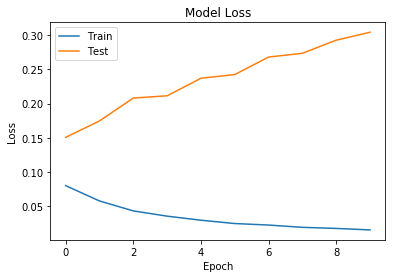

In [29]:
plot_loss(hist)

In [30]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=150)
print(loss_and_metrics)

14976/14976 [==============================] - 2s 107us/step
[0.3127061974328871, 0.9350961545386758]
